In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [5]:
train = pd.read_csv('original_data/original_train.csv')
val = pd.read_csv('original_data/original_val.csv')
test = pd.read_csv('new_data.csv')

In [6]:
num_classes = test['label'].nunique()

unique_classes = test['label'].unique()

print("Number of unique classes in 'label':", num_classes)
print("Unique classes in 'label':", unique_classes)

Number of unique classes in 'label': 215
Unique classes in 'label': ['fake' ' acording to INCINT"' nan ' Nobel Prize in Medicine'
 ' including coronaviruses."' ' in theory'
 ' Gerardo Morales: ???啾\ue97cn the Metropolitan Area [of Buenos Aires] 20% of those infected are health personnel????'
 ' anti-inflammatories and corticosteroids."' ' as it is less aggressive"'
 ' so that the virus can reactivate after the patient recovers"'
 ' Dr. Anthony Fauci and Melinda Gates at the ???啾\ue98auhan lab in 2015.????'
 ' amid the fight against covid-19."'
 '000 patients and 200 dead people from the pandemic."'
 ' in the White House."'
 ' doctors are paid $13000 thousand to say they got sick from COVID-19 and $39000 to put that ventilator on'
 ' but not for burning a church.????' ' vinegar'
 ' face masks and other protective equipment. There was no need for a lockdown and a curfew as well as the so-called contact tracing. The virus cannot survive on surfaces ???\uefb5\x80?such an isolation was only

In [7]:
test = test[(test['label'] == 'fake') | (test['label'] == 'real')]

In [8]:
num_classes = test['label'].nunique()

unique_classes = test['label'].unique()

print("Number of unique classes in 'label':", num_classes)
print("Unique classes in 'label':", unique_classes)

Number of unique classes in 'label': 2
Unique classes in 'label': ['fake' 'real']


In [9]:
missing_values = test.isnull().sum()
missing_values

tweet            0
label            0
Unnamed: 2    8629
dtype: int64

In [10]:
train['tweet'] = train['tweet'].map(lambda x: cleantext(x))
val['tweet'] = val['tweet'].map(lambda x: cleantext(x))
test['tweet'] = test['tweet'].map(lambda x: cleantext(x))

In [11]:
class_counts = test['label'].value_counts()

# Print the counts of each class
print(class_counts)

label
fake    8265
real     364
Name: count, dtype: int64


In [12]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))



SVM
test:
[[8030  235]
 [ 320   44]]
              precision    recall  f1-score   support

        fake       0.96      0.97      0.97      8265
        real       0.16      0.12      0.14       364

    accuracy                           0.94      8629
   macro avg       0.56      0.55      0.55      8629
weighted avg       0.93      0.94      0.93      8629

Accuracy :  0.9356820025495423
Precison :  0.9440617055068304
Recall :  0.9356820025495423
F1 :  0.9397686712083264


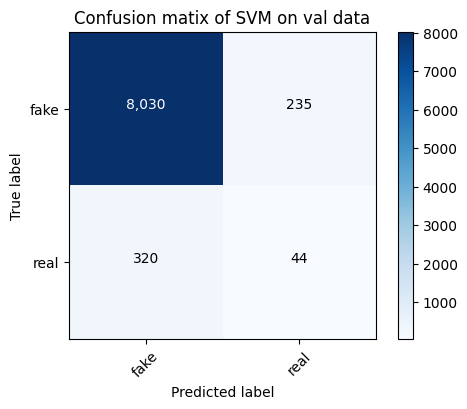

In [13]:
# Original experiment in LinearSVC() with default parameters
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', LinearSVC())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('SVM')
print ('test:')
pred=pipeline.predict(test['tweet'])
print_metrices(pred,test['label'])
plot_confusion_matrix(confusion_matrix(test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on val data')



SVM
test:
[[8038  227]
 [ 319   45]]
              precision    recall  f1-score   support

        fake       0.96      0.97      0.97      8265
        real       0.17      0.12      0.14       364

    accuracy                           0.94      8629
   macro avg       0.56      0.55      0.55      8629
weighted avg       0.93      0.94      0.93      8629

Accuracy :  0.9367249971027929
Precison :  0.9457758226756702
Recall :  0.9367249971027929
F1 :  0.9411263827247955


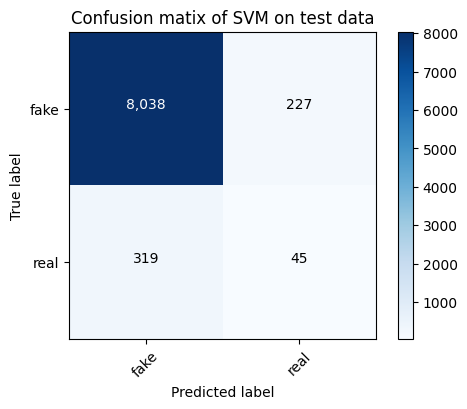

In [14]:
# Carried out the experiments in finding the best hyperparameter of LinearSVC() to modify the model
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', LinearSVC(C=0.9))
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('SVM')
print ('test:')
pred=pipeline.predict(test['tweet'])
print_metrices(pred,test['label'])
plot_confusion_matrix(confusion_matrix(test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on test data')

In [15]:
"""
val_ori = pd.read_csv('original_data/original_train.csv')
val_ori_reset = val_ori.iloc[:len(pred)]
pred_reindexed = pred[val_ori_reset.index]
svm_val_misclass_df = val_ori_reset[pred_reindexed != val['label']]
"""

"\nval_ori = pd.read_csv('original_data/original_train.csv')\nval_ori_reset = val_ori.iloc[:len(pred)]\npred_reindexed = pred[val_ori_reset.index]\nsvm_val_misclass_df = val_ori_reset[pred_reindexed != val['label']]\n"

Logistic Regression
test:
[[8062  203]
 [ 308   56]]
              precision    recall  f1-score   support

        fake       0.96      0.98      0.97      8265
        real       0.22      0.15      0.18       364

    accuracy                           0.94      8629
   macro avg       0.59      0.56      0.57      8629
weighted avg       0.93      0.94      0.94      8629

Accuracy :  0.9407810870321011
Precison :  0.9507784455299261
Recall :  0.9407810870321011
F1 :  0.9455845501907418


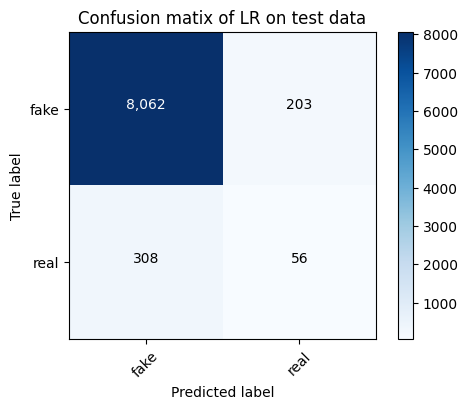

In [16]:
# Original experiment in LogisticRegression() with default parameters
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Logistic Regression')
print ('test:')
pred=pipeline.predict(test['tweet'])

print_metrices(pred,test['label'])
plot_confusion_matrix(confusion_matrix(test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of LR on test data')


Logistic Regression
test:
[[8044  221]
 [ 312   52]]
              precision    recall  f1-score   support

        fake       0.96      0.97      0.97      8265
        real       0.19      0.14      0.16       364

    accuracy                           0.94      8629
   macro avg       0.58      0.56      0.57      8629
weighted avg       0.93      0.94      0.93      8629

Accuracy :  0.9382315447908216
Precison :  0.9469888431061229
Recall :  0.9382315447908216
F1 :  0.9424744861131741


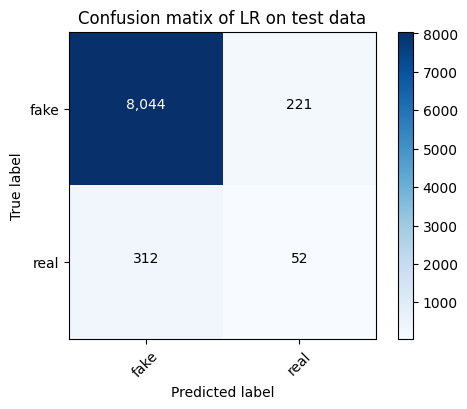

In [17]:
# Carried out the experiments in finding the best hyperparameter of LogisticRegression() to modify the model
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', LogisticRegression(C=10, solver='liblinear'))
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Logistic Regression')
print ('test:')
pred=pipeline.predict(test['tweet'])

print_metrices(pred,test['label'])
plot_confusion_matrix(confusion_matrix(test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of LR on test data')

Gradient Boost
test:
[[8037  228]
 [ 319   45]]
              precision    recall  f1-score   support

        fake       0.96      0.97      0.97      8265
        real       0.16      0.12      0.14       364

    accuracy                           0.94      8629
   macro avg       0.56      0.55      0.55      8629
weighted avg       0.93      0.94      0.93      8629

Accuracy :  0.9366091088190984
Precison :  0.9455602798901858
Recall :  0.9366091088190984
F1 :  0.9409634970054527


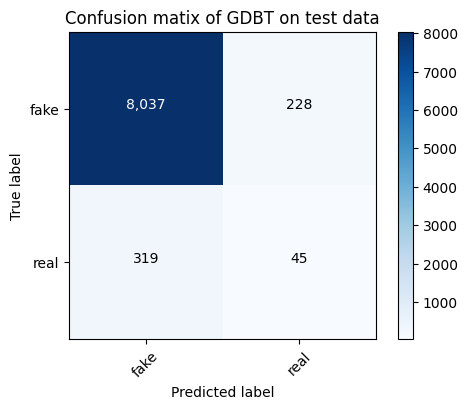

In [18]:
# Original experiment in GradientBoostingClassifier() with default parameters
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Gradient Boost')
print ('test:')
pred=pipeline.predict(test['tweet'])

print_metrices(pred,test['label'])
plot_confusion_matrix(confusion_matrix(test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of GDBT on test data')




Gradient Boost
test:
[[7988  277]
 [ 306   58]]
              precision    recall  f1-score   support

        fake       0.96      0.97      0.96      8265
        real       0.17      0.16      0.17       364

    accuracy                           0.93      8629
   macro avg       0.57      0.56      0.57      8629
weighted avg       0.93      0.93      0.93      8629

Accuracy :  0.9324371306060957
Precison :  0.9351497498035183
Recall :  0.9324371306060957
F1 :  0.9337794874739095


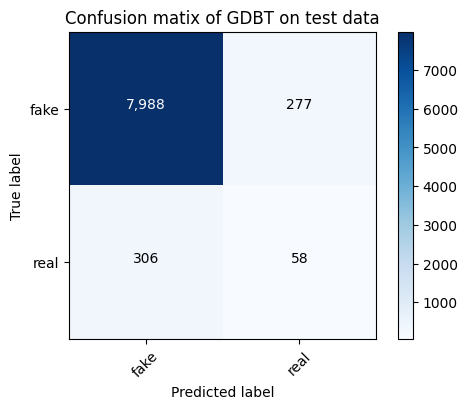

In [19]:
# Carried out the experiments in finding the best hyperparameter of GradientBoostingClassifier() to modify the model
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, subsample=0.8, min_samples_split=10, max_depth=7))
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Gradient Boost')
print ('test:')
pred=pipeline.predict(test['tweet'])

print_metrices(pred,test['label'])
plot_confusion_matrix(confusion_matrix(test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of GDBT on test data')

Decision Tree
test:
[[7410  855]
 [ 269   95]]
              precision    recall  f1-score   support

        fake       0.96      0.90      0.93      8265
        real       0.10      0.26      0.14       364

    accuracy                           0.87      8629
   macro avg       0.53      0.58      0.54      8629
weighted avg       0.93      0.87      0.90      8629

Accuracy :  0.8697415691273612
Precison :  0.8265801657312241
Recall :  0.8697415691273612
F1 :  0.8430898555196532


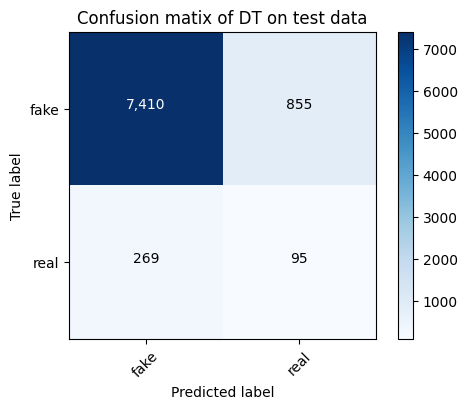

In [20]:
# Original experiment in tree.DecisionTreeClassifier() with default parameters
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Decision Tree')
print ('test:')
pred=pipeline.predict(test['tweet'])

print_metrices(pred,test['label'])
plot_confusion_matrix(confusion_matrix(test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of DT on test data')




Decision Tree
test:
[[7484  781]
 [ 304   60]]
              precision    recall  f1-score   support

        fake       0.96      0.91      0.93      8265
        real       0.07      0.16      0.10       364

    accuracy                           0.87      8629
   macro avg       0.52      0.54      0.52      8629
weighted avg       0.92      0.87      0.90      8629

Accuracy :  0.8742612121914475
Precison :  0.833317930329506
Recall :  0.8742612121914475
F1 :  0.8512424291897329


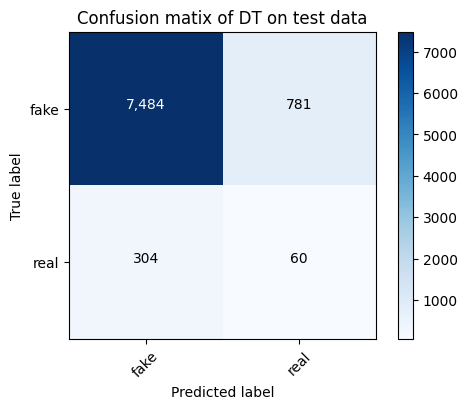

In [21]:
# Carried out the experiments in finding the best hyperparameter of DecisionTreeClassifier() to modify the model
pipeline = Pipeline([
        ('bow', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('c', tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=5))
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Decision Tree')
print ('test:')
pred=pipeline.predict(test['tweet'])

print_metrices(pred,test['label'])
plot_confusion_matrix(confusion_matrix(test['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of DT on test data')


In [22]:
#svm_val_misclass_df.info()

In [23]:
#svm_val_misclass_df.to_excel('svm_val_misclassified.xlsx')